In [1]:
import glob
import numpy as np
from cv2 import imread, circle
import BeeProcessor as bp
import matplotlib.pyplot as plt

### Setting up BeeProcessor

In [2]:
# Load image
# Expect one image in folder. In case of multiple image, the last one will be in img
for image in glob.glob('*.jpg'):
    img = imread(image)

In [3]:
# Region of Interest corners
vertices = np.array([[(400, 1160),
                      (3560, 1280),
                      (3500, 1710),
                      (450, 1620)]], dtype=np.int32)

In [4]:
# Basic setup
glassball = bp.BeeProcessor(img.shape, vertices)

# Setup with all parameter (value=deafult)
glassball2 = bp.BeeProcessor(img.shape,
                             vertices,
                             blurriness_threshold=300,
                             model_weights="Models/FCN_v6_weights-672-0.3838.hdf5",
                             lower_thresh=0.3,
                             upper_thresh=1,
                             min_size=6)

W0922 22:47:42.232134 14232 deprecation.py:506] From C:\Users\admin\.conda\envs\FCN\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# New image to be processed
glassball.new_input(img)

### Useful funtions of BeeProcessor

In [6]:
# Check blurriness in the enclosing rectangle of the RoI (=blacked out pixels included)
# Not efficient if you just want to check blurriness
flag, indicator = glassball.check_blurriness()
print('Above threshold?', flag, '; Blurriness indicator:', indicator)

Above threshold? False ; Blurriness indicator: 74.8464651661679


In [7]:
# Save segments of RoI for labeling
glassball.save_segments(folderpath='Saved_segments/', prefix='')

Prediction might not be accurate due to settings issues!
Number of segments: 30


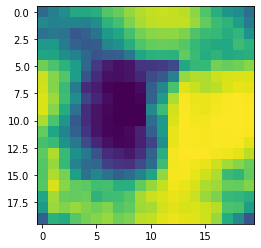

Has error? True ; Error message: Neural Network will not process the whole RoI! 


In [8]:
# Run prediction on segments of the RoI
# 200x200 px segment -> 20x20 px prediction
predictions = glassball.predict_class()
print('Number of segments:', predictions.shape[0])
plt.imshow(predictions[6, :, :, 0])
plt.show()

# Read errors
errorflag,errormsg = glassball.read_errors()
print('Has error?', errorflag, '; Error message:', errormsg)

Estimation will be less accurate due to settings issues!
Prediction might not be accurate due to settings issues!
Has error? True ; Error message: Neural Network will not process the whole RoI! 
Bee center estimation: [(1269, 90), (1160, 102), (1556, 108), (680, 162), (967, 149), (1042, 125), (2243, 168), (297, 255), (2038, 288), (555, 287), (1255, 258), (830, 296), (1051, 289), (1364, 286), (1160, 316), (2170, 295), (2231, 343), (1561, 324), (461, 358), (775, 330), (1728, 357), (1871, 367), (2435, 378), (2845, 378)]


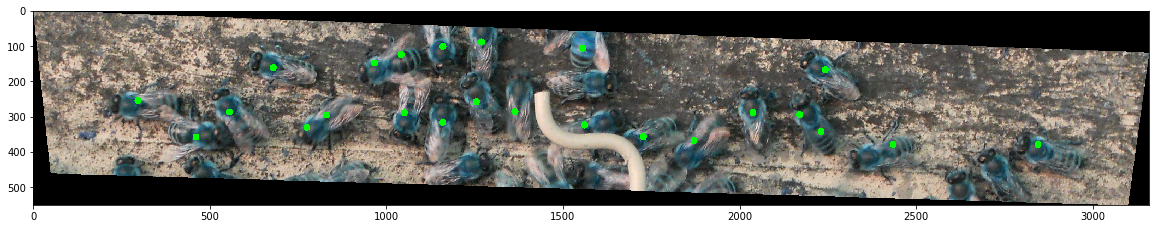

In [9]:
# Give estimation on bee postion. Runs prediction again!
centers = glassball.estimate_bee_positions()

# Read errors
errorflag,errormsg = glassball.read_errors()
print('Has error?', errorflag, '; Error message:', errormsg)

# Display data
print('Bee center estimation:', centers)
temp = glassball.strict_roi.copy()
for item in centers:
    circle(temp, item, 10, (0,255,0), -1) 

fig = plt.figure(figsize=(20,6))
plt.imshow(temp)